# Data Preparation

In [11]:
# ==================== Data Preparation ====================
import pandas as pd
import numpy as np
import difflib
import matplotlib.pyplot as plt
from joblib import dump
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# Load the food dataset (now in Excel format)
food_data = pd.read_excel('food_data.xlsx')  # Replace with your actual food dataset path

# Show dataset
print("Dataset Preview:")
print(food_data.head())


Dataset Preview:
      food_name                                        description   category
0         Pizza  A savory dish made with a yeasted flatbread, t...  Fast Food
1        Burger  A sandwich consisting of a cooked patty of gro...  Fast Food
2  Caesar Salad  A salad of romaine lettuce and croutons dresse...      Salad
3     Spaghetti  A type of pasta consisting of long, thin noodl...      Pasta
4     Ice Cream  A sweet frozen food made from milk or cream an...    Dessert


In [12]:
# Load Food Metadata
tmdb_data = pd.read_excel('food_data.xlsx')  # Correct file extension

# Print the first three rows
print(tmdb_data.head())


      food_name                                        description   category
0         Pizza  A savory dish made with a yeasted flatbread, t...  Fast Food
1        Burger  A sandwich consisting of a cooked patty of gro...  Fast Food
2  Caesar Salad  A salad of romaine lettuce and croutons dresse...      Salad
3     Spaghetti  A type of pasta consisting of long, thin noodl...      Pasta
4     Ice Cream  A sweet frozen food made from milk or cream an...    Dessert


In [13]:
# Load Food Metadata
metadata = pd.read_excel('food_data.xlsx')  # Correct file extension and removed low_memory

# Print the first three rows
print(metadata.head())

      food_name                                        description   category
0         Pizza  A savory dish made with a yeasted flatbread, t...  Fast Food
1        Burger  A sandwich consisting of a cooked patty of gro...  Fast Food
2  Caesar Salad  A salad of romaine lettuce and croutons dresse...      Salad
3     Spaghetti  A type of pasta consisting of long, thin noodl...      Pasta
4     Ice Cream  A sweet frozen food made from milk or cream an...    Dessert


# Data Exploration


Metadata Preview:
      food_name                                        description   category
0         Pizza  A savory dish made with a yeasted flatbread, t...  Fast Food
1        Burger  A sandwich consisting of a cooked patty of gro...  Fast Food
2  Caesar Salad  A salad of romaine lettuce and croutons dresse...      Salad

Dataset Preview:
      food_name                                        description   category
0         Pizza  A savory dish made with a yeasted flatbread, t...  Fast Food
1        Burger  A sandwich consisting of a cooked patty of gro...  Fast Food
2  Caesar Salad  A salad of romaine lettuce and croutons dresse...      Salad
3     Spaghetti  A type of pasta consisting of long, thin noodl...      Pasta
4     Ice Cream  A sweet frozen food made from milk or cream an...    Dessert

Most common food category: Japanese

Average description length of foods: 94.61904761904762

Number of desserts: 2


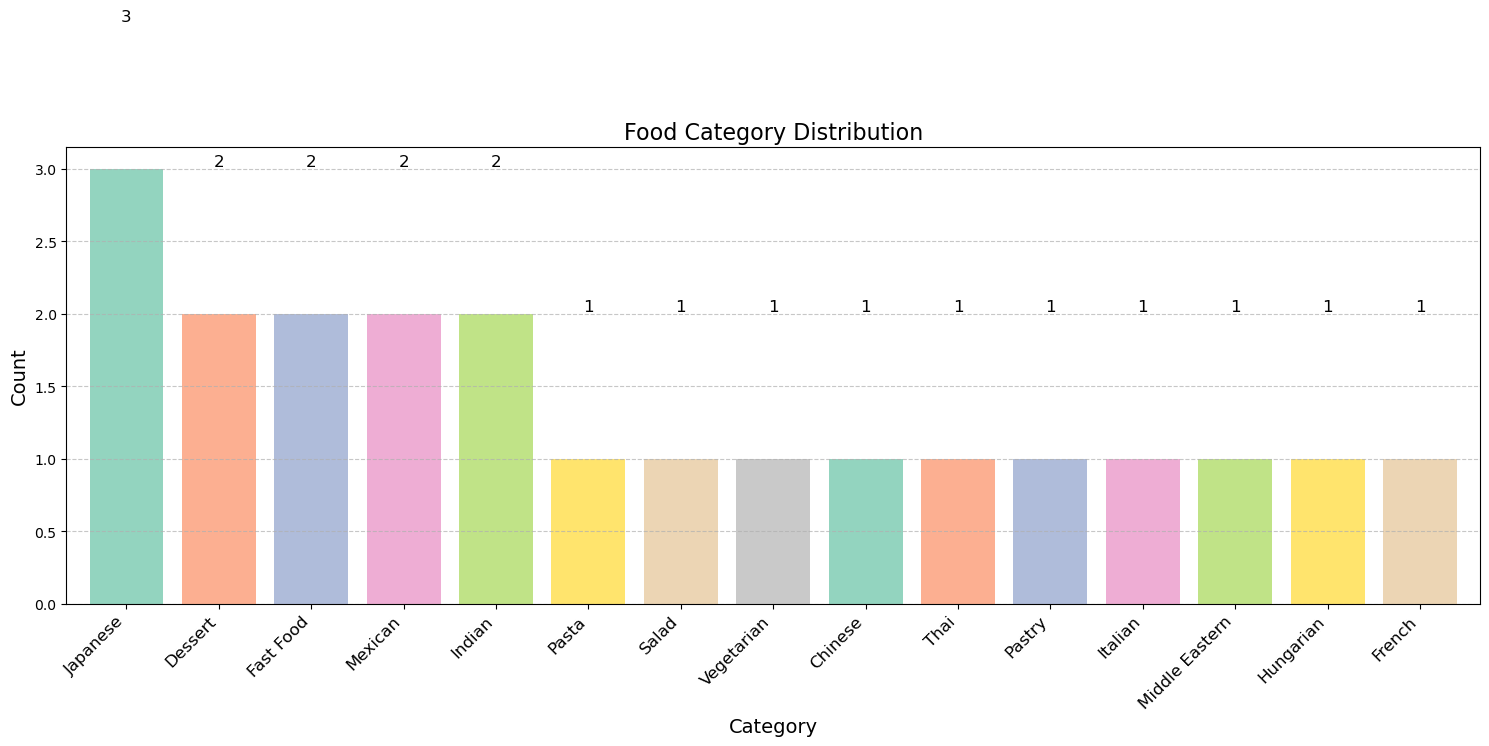

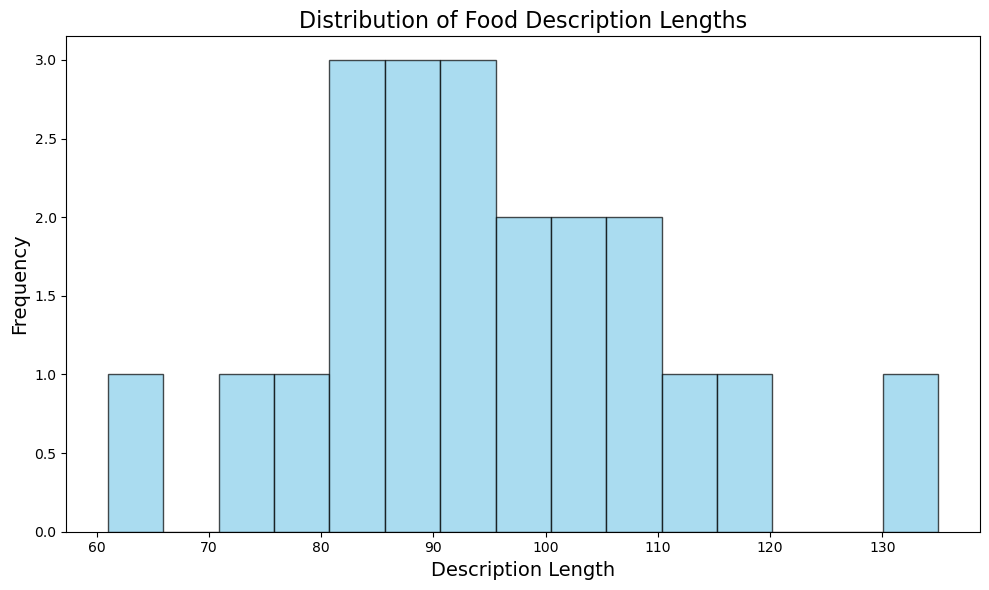

In [26]:
# ==================== Data Exploration ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the extended food dataset
food_data = pd.read_excel('food_data.xlsx')  # Correct file path for extended food dataset

# Print the first three rows
print("\nMetadata Preview:")
print(food_data.head(3))

# Preview dataset
print("\nDataset Preview:")
print(food_data.head())

# Calculate the most frequent food category
most_common_category = food_data['category'].mode()[0]
print("\nMost common food category:", most_common_category)

# Calculate the average food description length
avg_description_length = food_data['description'].apply(len).mean()
print("\nAverage description length of foods:", avg_description_length)

# Filter foods in the 'Dessert' category
desserts = food_data[food_data['category'] == 'Dessert']
print("\nNumber of desserts:", desserts.shape[0])

# ==================== Visualization - Bar Chart ====================
fig, ax = plt.subplots(figsize=(15, 8))  # Increased figure size for better readability

category_counts = food_data['category'].value_counts()

# Plot bar chart with customized options
category_counts.plot(kind='bar', color=plt.cm.Set2.colors, alpha=0.7, ax=ax, width=0.8)

# Set title and labels
ax.set_title('Food Category Distribution', fontsize=16)
ax.set_xlabel('Category', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

# Rotate category labels for better visibility
ax.set_xticklabels(category_counts.index, rotation=45, ha="right", fontsize=12)

# Adding value labels on top of bars
for i, v in enumerate(category_counts.values):
    ax.text(i, v + 1, str(v), color='black', ha='center', va='bottom', fontsize=12)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show bar chart
plt.show()

# ==================== Visualization - Description Length Histogram ====================
# Plotting histogram of description lengths
fig, ax = plt.subplots(figsize=(10, 6))

food_data['description_length'] = food_data['description'].apply(len)

# Plot the histogram with outlined bars
ax.hist(food_data['description_length'], bins=15, color='skyblue', alpha=0.7, edgecolor='black')  # Adding edgecolor

# Set title and labels
ax.set_title('Distribution of Food Description Lengths', fontsize=16)
ax.set_xlabel('Description Length', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()


# Content-Based Filtering Function

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_filtering(food_name):
    # Check if food_name exists in the dataset
    food_index = food_data[food_data['food_name'] == food_name].index
    if len(food_index) == 0:
        return f"Food name '{food_name}' not found in the dataset."

    food_index = food_index[0]  # First index

    food_data['combined_features'] = (
        food_data['description'].astype(str) + ' ' +
        food_data['category'].astype(str)
    )

    # Initialize CountVectorizer to convert text into a numerical format
    cv = CountVectorizer(stop_words='english')
    features_matrix = cv.fit_transform(food_data['combined_features'])

    # Calculate cosine similarity between all items
    similarity_scores = cosine_similarity(features_matrix, features_matrix)

    # Get similarity scores for the chosen food item
    similar_foods = list(enumerate(similarity_scores[food_index]))

    # Sort food items by similarity scores
    sorted_similar_foods = sorted(similar_foods, key=lambda x: x[1], reverse=True)

    # Get the top 10 similar foods (excluding the food itself)
    top_similar_foods = sorted_similar_foods[1:11]
    
    # Return the top similar food items with their similarity score
    recommended_foods = [(food_data['food_name'].iloc[i], score) for i, score in top_similar_foods]
    
    return recommended_foods

# Example usage
food_item = 'Pizza'  # Example food item
print(f"Recommended foods for {food_item}:")
print(content_based_filtering(food_item))


Recommended foods for Pizza:
[('Tacos', np.float64(0.3344968040028363)), ('Quiche', np.float64(0.2860387767736777)), ('Burrito', np.float64(0.24174688920761409)), ('Ice Cream', np.float64(0.20100756305184242)), ('Lasagna', np.float64(0.19069251784911848)), ('Cheesecake', np.float64(0.18181818181818182)), ('Burger', np.float64(0.16724840200141816)), ('Chicken Curry', np.float64(0.10050378152592121)), ('Sushi', np.float64(0.08058229640253803)), ('Peking Duck', np.float64(0.0778498944161523))]


# Collaborative Filtering

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

numeric_columns = ['description_length']  # Replace with actual numeric columns (e.g., rating, price)
food_data['description_length'] = food_data['description'].apply(len)  # Using description length as a numeric feature
numeric_data = food_data[numeric_columns].fillna(0)

# Collaborative Filtering function
def collaborative_filtering(food_name):
    # Check if food_name exists in the dataset
    food_index = food_data[food_data['food_name'] == food_name].index
    if len(food_index) == 0:
        return f"Food name '{food_name}' not found in the dataset."

    food_index = food_index[0]  # Get the first matching index
    similarity_matrix = cosine_similarity(numeric_data)
    
    # Get similarity scores of the given food item
    similar_foods = list(enumerate(similarity_matrix[food_index]))
    
    # Sort by similarity score
    sorted_similar_foods = sorted(similar_foods, key=lambda x: x[1], reverse=True)
    
    # Get the top 10 similar foods (skip the food itself)
    top_similar_foods = sorted_similar_foods[1:11]
    
    # Return food names and similarity scores
    recommended_foods = []
    for idx, score in top_similar_foods:
        recommended_foods.append((food_data.iloc[idx]['food_name'], score))
    
    return recommended_foods

# Example usage
food_name = 'Pizza'  # Try any food name that exists in your dataset
recommendations = collaborative_filtering(food_name)

# Check if recommendations is a string (error message)
if isinstance(recommendations, str):
    print(recommendations)
else:
    print(f"\nTop 10 foods similar to {food_name}:")
    for food, score in recommendations:
        print(f"{food} (Similarity Score: {score:.4f})")



Top 10 foods similar to Pizza:
Burger (Similarity Score: 1.0000)
Caesar Salad (Similarity Score: 1.0000)
Spaghetti (Similarity Score: 1.0000)
Ice Cream (Similarity Score: 1.0000)
Sushi (Similarity Score: 1.0000)
Tacos (Similarity Score: 1.0000)
Cheesecake (Similarity Score: 1.0000)
Falafel (Similarity Score: 1.0000)
Chicken Curry (Similarity Score: 1.0000)
Burrito (Similarity Score: 1.0000)


# Data Execute/testing

In [21]:
import pandas as pd
import difflib
from sklearn.metrics.pairwise import cosine_similarity

# ==================== Load Dataset ====================
food_data = pd.read_excel('food_data.xlsx')  # Load your food dataset

# Make sure the column names match exactly
print("Columns are:", food_data.columns.tolist())

# ==================== Collaborative Filtering ====================
# Define numeric columns (using description length as a numeric feature)
food_data['description_length'] = food_data['description'].apply(len)  # Example feature
numeric_columns = ['description_length']  # Use correct numeric columns
numeric_data = food_data[numeric_columns].fillna(0)

# Collaborative Filtering function
def collaborative_filtering(food_name):
    # Check if food_name exists
    food_index = food_data[food_data['food_name'] == food_name].index
    if len(food_index) == 0:
        return f"Food name '{food_name}' not found in the dataset."

    food_index = food_index[0]
    similarity_matrix = cosine_similarity(numeric_data)
    similar_foods = list(enumerate(similarity_matrix[food_index]))
    sorted_similar_foods = sorted(similar_foods, key=lambda x: x[1], reverse=True)
    top_similar_foods = sorted_similar_foods[1:11]  # Top 10 similar foods
    return top_similar_foods

# ==================== Content-Based Filtering ====================
content_columns = ['category', 'description']
content_data = pd.get_dummies(food_data[content_columns])

def content_based_filtering(food_name):
    food_index = food_data[food_data['food_name'] == food_name].index
    if len(food_index) == 0:
        return f"Food name '{food_name}' not found in the dataset."

    food_index = food_index[0]
    similarity_matrix = cosine_similarity(content_data)
    similar_foods = list(enumerate(similarity_matrix[food_index]))
    sorted_similar_foods = sorted(similar_foods, key=lambda x: x[1], reverse=True)
    top_similar_foods = sorted_similar_foods[1:11]
    return top_similar_foods

# ==================== Find Closest Match ====================
def find_closest_match(user_input):
    food_names = food_data['food_name'].tolist()  # Correct column name
    closest_matches = difflib.get_close_matches(user_input, food_names, n=1)
    return closest_matches[0] if closest_matches else None

# ==================== Testing ====================
test_foods = ['Pizza', 'Burger', 'Ice Cream', 'Sushi']

for test_food in test_foods:
    print("\n\n===== Testing for:", test_food, "=====")
    closest_match = find_closest_match(test_food)

    if closest_match:
        print(f"Closest match: {closest_match}")

        collab_results = collaborative_filtering(closest_match)
        content_results = content_based_filtering(closest_match)

        print("\nCollaborative Filtering Results:")
        if isinstance(collab_results, str):
            print("Error:", collab_results)
        else:
            for idx, (food_idx, score) in enumerate(collab_results, start=1):
                print(f"{idx}. {food_data.iloc[food_idx]['food_name']} (Score: {score:.4f})")

        print("\nContent-Based Filtering Results:")
        if isinstance(content_results, str):
            print("Error:", content_results)
        else:
            for idx, (food_idx, score) in enumerate(content_results, start=1):
                print(f"{idx}. {food_data.iloc[food_idx]['food_name']} (Score: {score:.4f})")

    else:
        print("No close match found.")


Columns are: ['food_name', 'description', 'category']


===== Testing for: Pizza =====
Closest match: Pizza

Collaborative Filtering Results:
1. Burger (Score: 1.0000)
2. Caesar Salad (Score: 1.0000)
3. Spaghetti (Score: 1.0000)
4. Ice Cream (Score: 1.0000)
5. Sushi (Score: 1.0000)
6. Tacos (Score: 1.0000)
7. Cheesecake (Score: 1.0000)
8. Falafel (Score: 1.0000)
9. Chicken Curry (Score: 1.0000)
10. Burrito (Score: 1.0000)

Content-Based Filtering Results:
1. Burger (Score: 0.5000)
2. Caesar Salad (Score: 0.0000)
3. Spaghetti (Score: 0.0000)
4. Ice Cream (Score: 0.0000)
5. Sushi (Score: 0.0000)
6. Tacos (Score: 0.0000)
7. Cheesecake (Score: 0.0000)
8. Falafel (Score: 0.0000)
9. Chicken Curry (Score: 0.0000)
10. Burrito (Score: 0.0000)


===== Testing for: Burger =====
Closest match: Burger

Collaborative Filtering Results:
1. Burger (Score: 1.0000)
2. Caesar Salad (Score: 1.0000)
3. Spaghetti (Score: 1.0000)
4. Ice Cream (Score: 1.0000)
5. Sushi (Score: 1.0000)
6. Tacos (Score: 1.0000)


In [22]:
def find_closest_match(user_input):
    food_names = food_data['food_name'].tolist()  # Correct column name for food dataset
    closest_matches = difflib.get_close_matches(user_input, food_names, n=1)
    
    return closest_matches[0] if closest_matches else None


# Evaluation using Precision, Recall, F1

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Let's simulate relevance: relevant if same category
def is_relevant(food1, food2):
    return food1['category'] == food2['category']

def evaluate_recommendations(test_food):
    closest_match = find_closest_match(test_food)
    if not closest_match:
        print("No match found for", test_food)
        return None

    recommendations = collaborative_filtering(closest_match)
    if isinstance(recommendations, str):
        print(recommendations)
        return None

    # Ground truth: assume same category is relevant
    y_true = []
    y_pred = []

    for idx, (food_idx, score) in enumerate(recommendations):
        recommended_food = food_data.iloc[food_idx]
        relevant = is_relevant(food_data.loc[food_data['food_name'] == closest_match].iloc[0], recommended_food)
        y_true.append(1)  # We expected relevant foods
        y_pred.append(1 if relevant else 0)

    # Calculate precision, recall, f1 with zero_division=0
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    return precision, recall, f1

# Example evaluation
test_foods = ['Pizza', 'Burger', 'Ice Cream', 'Sushi']

for test_food in test_foods:
    result = evaluate_recommendations(test_food)
    if result:
        precision, recall, f1 = result
        print(f"\nEvaluation for {test_food}:")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1 Score: {f1:.2f}")



Evaluation for Pizza:
Precision: 1.00
Recall: 0.10
F1 Score: 0.18

Evaluation for Burger:
Precision: 1.00
Recall: 0.10
F1 Score: 0.18

Evaluation for Ice Cream:
Precision: 1.00
Recall: 0.20
F1 Score: 0.33

Evaluation for Sushi:
Precision: 1.00
Recall: 0.10
F1 Score: 0.18


# Evaluation using MSE or RMSE

In [27]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assume we have a function for collaborative filtering and finding closest match as before

def evaluate_mse(test_food):
    closest_match = find_closest_match(test_food)
    if not closest_match:
        print("No match found for", test_food)
        return None

    # Get the recommendations for the closest match
    recommendations = collaborative_filtering(closest_match)
    if isinstance(recommendations, str):
        print(recommendations)
        return None

    # Predicted similarity scores from recommendations
    predicted_scores = [score for idx, score in recommendations]

    # Expected scores (we assume perfect similarity for relevant recommendations)
    expected_scores = [1] * len(predicted_scores)

    # Calculate MSE and RMSE
    mse = mean_squared_error(expected_scores, predicted_scores)
    rmse = np.sqrt(mse)

    return mse, rmse

# Example evaluation for food items
test_foods = ['Pizza', 'Burger', 'Ice Cream', 'Sushi']

for test_food in test_foods:
    result = evaluate_mse(test_food)
    if result:
        mse, rmse = result
        print(f"\nMSE and RMSE for {test_food}:")
        print(f"MSE: {mse:.4f}")
        print(f"RMSE: {rmse:.4f}")



MSE and RMSE for Pizza:
MSE: 0.0000
RMSE: 0.0000

MSE and RMSE for Burger:
MSE: 0.0000
RMSE: 0.0000

MSE and RMSE for Ice Cream:
MSE: 0.0000
RMSE: 0.0000

MSE and RMSE for Sushi:
MSE: 0.0000
RMSE: 0.0000
